In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:

!apt-get install build-essential cmake
!apt-get install libopenblas-dev liblapack-dev 
!pip3 install mtcnn
!pip3 install opencv-contrib-python
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from numpy import asarray
from PIL import Image
import cv2
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

# Load cnn_face_detector with 'mmod_face_detector'
# dnnFaceDetector=dlib.cnn_face_detection_model_v1("/content/drive/My Drive/cnn/mmod_human_face_detector.dat")

In [ ]:



detector = MTCNN()
facenet_model = load_model('/content/drive/My Drive/cnn/facenet_keras.h5')


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
def highlight_faces(image_path, faces):
  # display image
    image = cv2.imread(image_path)
    plt.imshow(image)

    ax = plt.gca()

    # for each face, draw a rectangle based on coordinates
    for face in faces:
        x, y, width, height = face['box']
        face_border = Rectangle((x, y), width, height,
                          fill=False, color='red')
        ax.add_patch(face_border)
    plt.show()

In [ ]:
def extract_face_from_image(image_path, required_size=(160, 160)):
  # load image and detect faces
    image = cv2.imread(image_path)
    detector = MTCNN()
    faces = detector.detect_faces(image)
    print(faces)
    face_images = []

    for face in faces:
        # extract the bounding box from the requested face
        x1, y1, width, height = face['box']
        x2, y2 = x1 + width, y1 + height
        # extract the face
        face_boundary = image[y1:y2, x1:x2]
        # resize pixels to the model size
        face_image = Image.fromarray(face_boundary)
        face_image = face_image.resize(required_size)
        face_array = asarray(face_image)
        face_images.append(face_array)


    return face_images


In [ ]:
def load_face(dir):
    faces = list()
    # enumerate files
    for filename in os.listdir(dir):

      try:
        path = dir + filename
        face = extract_face_from_image(path)
        faces.append(face[0])
      except:
        continue

    return faces

In [ ]:
def load_dataset(dir):
    # list for faces and labels
    X, y = list(), list()
    for subdir in os.listdir(dir):
        path = dir + subdir + '/'
        faces = load_face(path)
        labels = [subdir for i in range(len(faces))]
        print("loaded %d sample for class: %s" % (len(faces),subdir) ) # print progress
        X.extend(faces)
        y.extend(labels)
    
    return np.asarray(X), np.asarray(y)


In [ ]:
trainX, trainy = load_dataset('/content/drive/My Drive/cnn/Images/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('/content/drive/My Drive/cnn/TestImages/')
print(testX.shape, testy.shape)

[{'box': [1068, 998, 1424, 1803], 'confidence': 0.998144268989563, 'keypoints': {'left_eye': (1374, 1675), 'right_eye': (2049, 1651), 'nose': (1598, 2062), 'mouth_left': (1412, 2352), 'mouth_right': (2028, 2329)}}, {'box': [-3, 3588, 153, 190], 'confidence': 0.724693238735199, 'keypoints': {'left_eye': (53, 3651), 'right_eye': (108, 3657), 'nose': (78, 3693), 'mouth_left': (39, 3713), 'mouth_right': (90, 3719)}}]
[{'box': [1111, 837, 1468, 1878], 'confidence': 0.9926071166992188, 'keypoints': {'left_eye': (1397, 1554), 'right_eye': (2089, 1536), 'nose': (1601, 1974), 'mouth_left': (1424, 2269), 'mouth_right': (2070, 2241)}}]
[{'box': [1107, 793, 1387, 1797], 'confidence': 0.9987987279891968, 'keypoints': {'left_eye': (1468, 1464), 'right_eye': (2119, 1459), 'nose': (1777, 1833), 'mouth_left': (1467, 2088), 'mouth_right': (2136, 2082)}}]
[{'box': [1117, 745, 1407, 1847], 'confidence': 0.9990425705909729, 'keypoints': {'left_eye': (1485, 1433), 'right_eye': (2156, 1425), 'nose': (1817, 1

IMG-20200624-WA0035.jpg
[{'box': [49, 72, 112, 144], 'confidence': 0.9879095554351807, 'keypoints': {'left_eye': (84, 133), 'right_eye': (137, 131), 'nose': (113, 161), 'mouth_left': (85, 181), 'mouth_right': (137, 179)}}]


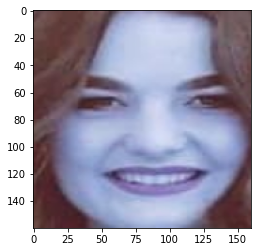

IMG-20200624-WA0036.jpg
[{'box': [135, 108, 145, 174], 'confidence': 0.999695897102356, 'keypoints': {'left_eye': (175, 179), 'right_eye': (244, 176), 'nose': (210, 214), 'mouth_left': (179, 235), 'mouth_right': (245, 234)}}]


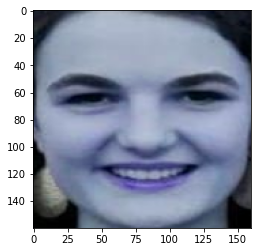

IMG-20200624-WA0040.jpg
[{'box': [276, 77, 193, 230], 'confidence': 0.9999957084655762, 'keypoints': {'left_eye': (323, 160), 'right_eye': (414, 176), 'nose': (348, 222), 'mouth_left': (311, 248), 'mouth_right': (390, 263)}}]


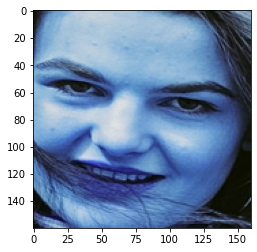

IMG-20200624-WA0045.jpg
[{'box': [201, 225, 93, 107], 'confidence': 0.9975702166557312, 'keypoints': {'left_eye': (225, 272), 'right_eye': (269, 262), 'nose': (251, 282), 'mouth_left': (235, 309), 'mouth_right': (276, 301)}}]


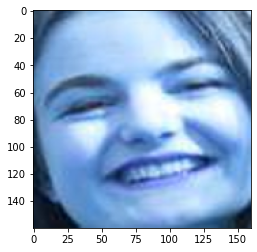

IMG-20200624-WA0051.jpg
[{'box': [219, 349, 87, 99], 'confidence': 0.9992794394493103, 'keypoints': {'left_eye': (241, 392), 'right_eye': (280, 384), 'nose': (261, 411), 'mouth_left': (250, 426), 'mouth_right': (287, 418)}}]


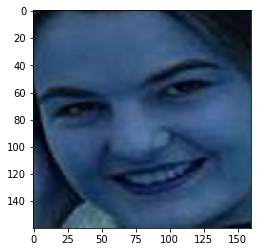

IMG-20200624-WA0048.jpg
[{'box': [251, 227, 43, 55], 'confidence': 0.9994640946388245, 'keypoints': {'left_eye': (262, 248), 'right_eye': (284, 248), 'nose': (273, 257), 'mouth_left': (262, 267), 'mouth_right': (285, 266)}}]


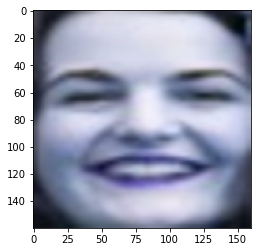

IMG-20200624-WA0047.jpg
[{'box': [250, 336, 53, 66], 'confidence': 0.9998226761817932, 'keypoints': {'left_eye': (255, 365), 'right_eye': (277, 360), 'nose': (262, 377), 'mouth_left': (263, 390), 'mouth_right': (281, 386)}}]


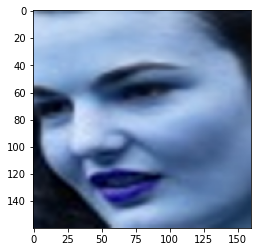

IMG-20200624-WA0058.jpg
[{'box': [457, 99, 162, 200], 'confidence': 0.9993033409118652, 'keypoints': {'left_eye': (507, 185), 'right_eye': (586, 186), 'nose': (545, 222), 'mouth_left': (511, 253), 'mouth_right': (576, 255)}}]


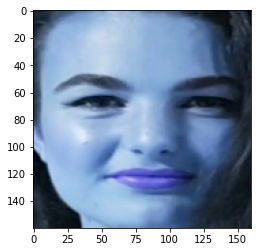

IMG-20200624-WA0050.jpg
[{'box': [149, 124, 32, 38], 'confidence': 0.9952669143676758, 'keypoints': {'left_eye': (158, 137), 'right_eye': (174, 136), 'nose': (167, 141), 'mouth_left': (159, 152), 'mouth_right': (175, 151)}}]


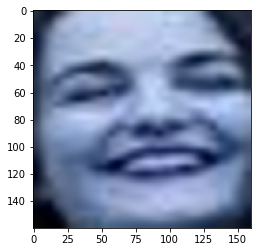

IMG-20200624-WA0068.jpg
[{'box': [697, 184, 164, 203], 'confidence': 0.9996323585510254, 'keypoints': {'left_eye': (746, 263), 'right_eye': (827, 259), 'nose': (787, 302), 'mouth_left': (756, 345), 'mouth_right': (823, 342)}}]


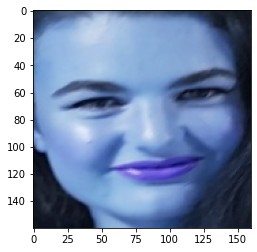

IMG-20200624-WA0057.jpg
[{'box': [630, 131, 110, 157], 'confidence': 0.9983205199241638, 'keypoints': {'left_eye': (642, 198), 'right_eye': (686, 187), 'nose': (649, 224), 'mouth_left': (651, 251), 'mouth_right': (699, 241)}}]


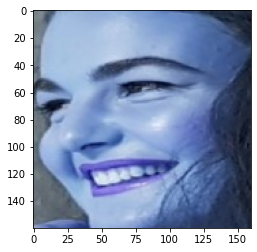

IMG-20200624-WA0069.jpg
[{'box': [624, 90, 157, 188], 'confidence': 0.9993690848350525, 'keypoints': {'left_eye': (660, 166), 'right_eye': (736, 155), 'nose': (692, 184), 'mouth_left': (667, 231), 'mouth_right': (739, 222)}}]


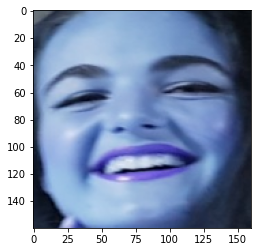

IMG-20200624-WA0070.jpg
[{'box': [682, 128, 141, 179], 'confidence': 0.9992501139640808, 'keypoints': {'left_eye': (705, 207), 'right_eye': (766, 193), 'nose': (726, 238), 'mouth_left': (721, 268), 'mouth_right': (781, 257)}}]


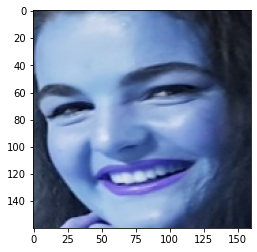

IMG-20200624-WA0073.jpg
[{'box': [662, 116, 212, 270], 'confidence': 0.9999300241470337, 'keypoints': {'left_eye': (728, 222), 'right_eye': (825, 231), 'nose': (776, 275), 'mouth_left': (719, 308), 'mouth_right': (820, 316)}}]


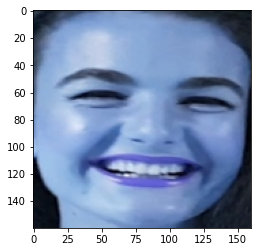

IMG-20200624-WA0072.jpg
[{'box': [710, 103, 167, 198], 'confidence': 0.9997982382774353, 'keypoints': {'left_eye': (759, 192), 'right_eye': (836, 184), 'nose': (800, 229), 'mouth_left': (769, 257), 'mouth_right': (835, 252)}}]


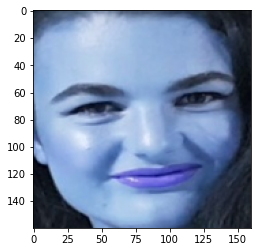

IMG-20200624-WA0074.jpg
[{'box': [811, 112, 145, 177], 'confidence': 0.9999133348464966, 'keypoints': {'left_eye': (842, 188), 'right_eye': (906, 173), 'nose': (871, 219), 'mouth_left': (858, 249), 'mouth_right': (920, 236)}}]


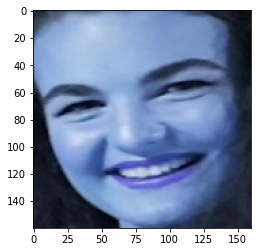

In [ ]:
# functia asta e pentru a decupa poze, insa nu ne mai trebuie
# (nu o stergeti totusi)

def iterate_images_in_folder(folder_name, person_name):
  folder=os.listdir(folder_name)
  for image in folder:
    print(image)
    try:
      extracted_face=extract_face_from_image(folder_name+image)
      cv2.imwrite('/content/drive/My Drive/cnn/CroppedImages/'+person_name+'/'+image,extracted_face[0])
      plt.imshow(extracted_face[0])
      plt.show()
    except:
      continue
iterate_images_in_folder('/content/drive/My Drive/cnn/Images/andrada/', 'andrada')


In [ ]:
def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    #mai adaugam o dimensiune
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]



emdTrainX = list()
for face in trainX:
    emd = get_embedding(facenet_model, face)
    emdTrainX.append(emd)
    
emdTrainX = np.asarray(emdTrainX)
print(emdTrainX.shape)

# convert each face in the test set into embedding
emdTestX = list()
for face in testX:
    emd = get_embedding(facenet_model, face)
    emdTestX.append(emd)
emdTestX = np.asarray(emdTestX)
print(emdTestX.shape)


(47, 128)
(15, 128)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

print("Dataset: train=%d, test=%d" % (emdTrainX.shape[0], emdTestX.shape[0]))
# normalize input vectors
in_encoder = Normalizer()
emdTrainX_norm = in_encoder.transform(emdTrainX)
emdTestX_norm = in_encoder.transform(emdTestX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy_enc = out_encoder.transform(trainy)
testy_enc = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(emdTrainX_norm, trainy_enc)
yhat_train = model.predict(emdTrainX_norm)
yhat_test = model.predict(emdTestX_norm)
# score
score_train = accuracy_score(trainy_enc, yhat_train)
score_test = accuracy_score(testy_enc, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=47, test=15
Accuracy: train=100.000, test=100.000


Predicted: 
['andrada' 'maria' 'sonia'] 
[ 3.56436772  3.55801316 92.87761912]
Expected: sonia


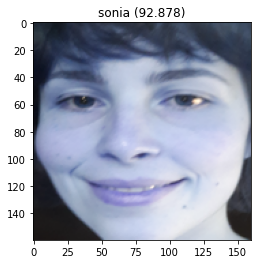

In [ ]:
from random import choice
def exemplify_face_recognition():
  selection = choice([i for i in range(testX.shape[0])])
  random_face = testX[selection]
  random_face_emd = emdTestX_norm[selection]
  random_face_class = testy_enc[selection]
  random_face_name = out_encoder.inverse_transform([random_face_class])

  # prediction for the face
  samples = np.expand_dims(random_face_emd, axis=0)
  yhat_class = model.predict(samples)
  yhat_prob = model.predict_proba(samples)
  # get name
  class_index = yhat_class[0]
  class_probability = yhat_prob[0,class_index] * 100
  predict_names = out_encoder.inverse_transform(yhat_class)
  all_names = out_encoder.inverse_transform([0,1,2])
  #print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
  print('Predicted: \n%s \n%s' % (all_names, yhat_prob[0]*100))
  print('Expected: %s' % random_face_name[0])
  # plot face
  plt.imshow(random_face)
  title = '%s (%.3f)' % (predict_names[0], class_probability)
  plt.title(title)
  plt.show()

exemplify_face_recognition()


Predicted: 
['andrada' 'maria' 'sonia'] 
[2.01618846e-12 9.99999950e+01 5.03662548e-06]
Predicted: 
['andrada' 'maria' 'sonia'] 
[3.33354872e-12 1.66690716e-12 1.00000000e+02]
Predicted: 
['andrada' 'maria' 'sonia'] 
[9.99999850e+01 5.00420712e-06 1.00041990e-05]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


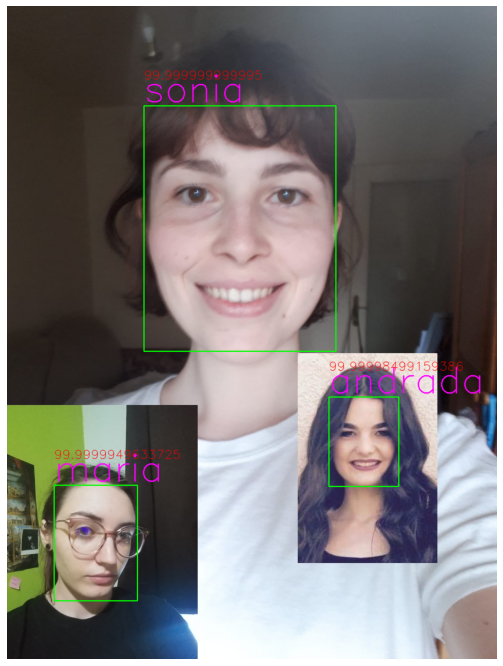

In [ ]:
def place_border_and_name(image_path, required_size=(160, 160)):
  image = cv2.imread(image_path)
  detector = MTCNN()
  faces = detector.detect_faces(image)
  facesx=list()  
  face_points_for_border=[]
  for face in faces:
    x1, y1, width, height = face['box']
    bottom=height+y1
    right=width+x1
    top=y1
    left=x1
    list_with_points=[left, top, right, bottom]
    face_points_for_border.append(list_with_points)
    face_boundary = image[y1:bottom, left:right]
    face_image = Image.fromarray(face_boundary)
    face_image = face_image.resize(required_size)
    face_array = asarray(face_image)
    facesx.append(face_array)
  # facesx=np.asarray(facesx)
  emdfacex = list()
  for face_ in facesx:
    emd = get_embedding(facenet_model, face_)
    emdfacex.append(emd)
  counter_face=0
  for face__ in emdfacex:
    samples = np.expand_dims(face__, axis=0)
    all_names = out_encoder.inverse_transform([0,1,2])
    yhat_class = model.predict(samples)
    yhat_prob = model.predict_proba(samples)
    class_index = yhat_class[0]
    class_probability = yhat_prob[0,class_index] * 100
    predicted_name = out_encoder.inverse_transform(yhat_class)
    print('Predicted: \n%s \n%s' % (all_names, yhat_prob[0]*100))
    if(predicted_name==[]):
      predicted_name=['Unknown']
    cv2.rectangle(image,(face_points_for_border[counter_face][0],face_points_for_border[counter_face][1]),(face_points_for_border[counter_face][2],face_points_for_border[counter_face][3]),(0,255,0), 2)
    image=cv2.putText(image,predicted_name[0],(face_points_for_border[counter_face][0],face_points_for_border[counter_face][1]-10),cv2.FONT_HERSHEY_SIMPLEX,3,(255,0,255),2,cv2.LINE_AA)
    image=cv2.putText(image,str(class_probability),(face_points_for_border[counter_face][0],face_points_for_border[counter_face][1]-65),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),1,cv2.LINE_AA)

    counter_face+=1
  plt.figure(figsize=(24,12))
  plt.imshow(image[:,:,::-1])
  plt.axis('off')
  plt.show()

place_border_and_name('/content/drive/My Drive/cnn/TestImagesUnknown/WhatsApp Image 2020-06-24 at 15.41.36 (1).jpg')

      